## Assignment 3
### Name: Subash Rokka
### StudentID: c0916455

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names for Fashion MNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print("Training data shape:", train_images.shape, train_labels.shape)
print("Test data shape:", test_images.shape, test_labels.shape)

Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

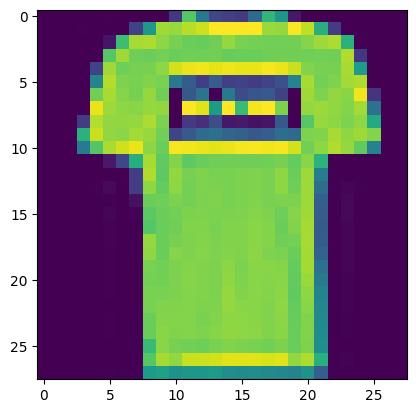

In [5]:
plt.imshow(train_images[1])

In [12]:
train_labels[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [6]:
# Data Preprocessing
# Normalize pixel values to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0



In [7]:
# Split training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)



In [8]:
# Reshape data for the ANN (Flattened, 1D array)
train_images = train_images.reshape(-1, 28 * 28)
val_images = val_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)



In [9]:
# Convert labels to one-hot encoded format
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

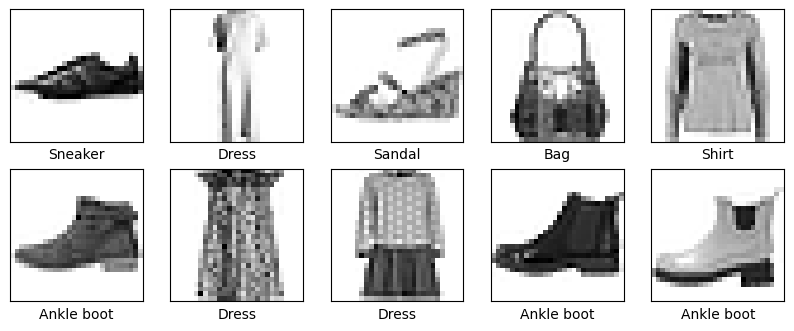

In [10]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(train_labels[i])])
plt.show()

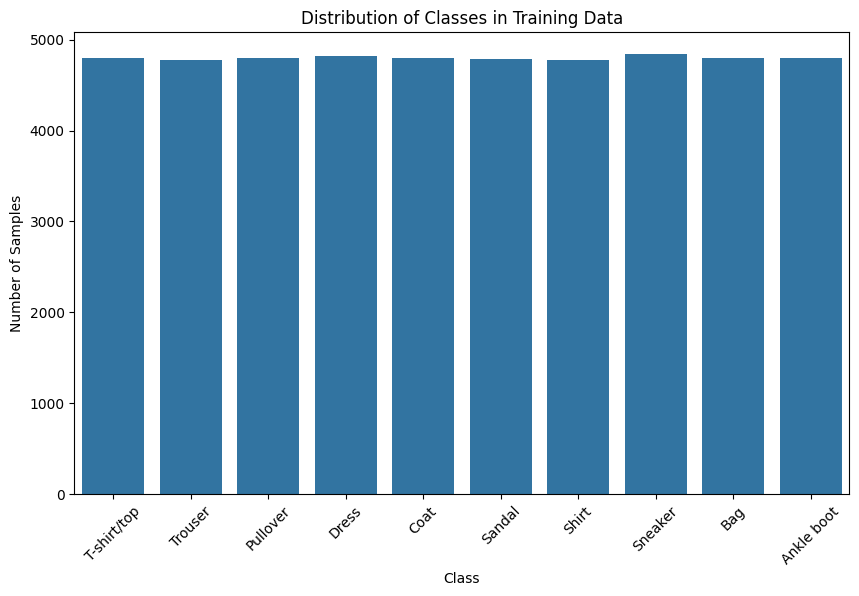

In [11]:
# Bar chart of label distribution
unique, counts = np.unique(np.argmax(train_labels, axis=1), return_counts=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=[class_names[i] for i in unique], y=counts)
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Distribution of Classes in Training Data")
plt.show()

### Building model

In [13]:
# Defining the model
model = Sequential([
    Flatten(input_shape=(28 * 28,)),        # Flatten layer to reshape images
    Dense(128, activation='relu'),           # First hidden layer
    Dense(64, activation='relu'),            # Second hidden layer
    Dense(10, activation='softmax')          # Output layer
])

c:\Users\subas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7656 - loss: 0.6759 - val_accuracy: 0.8472 - val_loss: 0.4262
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8570 - loss: 0.3853 - val_accuracy: 0.8610 - val_loss: 0.3787
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8719 - loss: 0.3529 - val_accuracy: 0.8698 - val_loss: 0.3553
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8824 - loss: 0.3203 - val_accuracy: 0.8583 - val_loss: 0.3901
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8898 - loss: 0.2966 - val_accuracy: 0.8780 - val_loss: 0.3426
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8943 - loss: 0.2827 - val_accuracy: 0.8842 - val_loss: 0.3367
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8986 - loss: 0.2695 - val_accuracy: 0.8784 - val_loss: 0.3380
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9021 - loss: 0.2567 - 

### Model Evaluation

Text(0.5, 1.0, 'Training and Validation Accuracy')

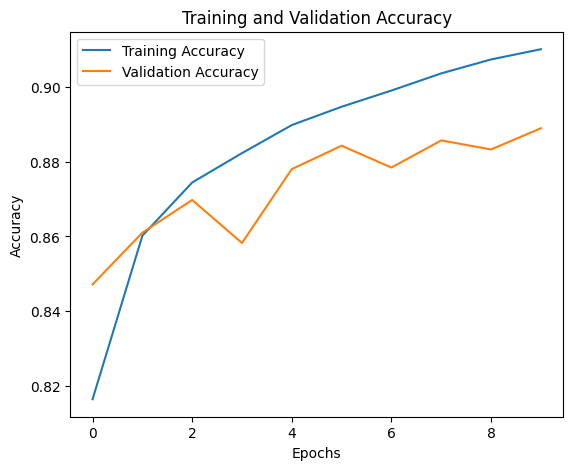

In [16]:
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

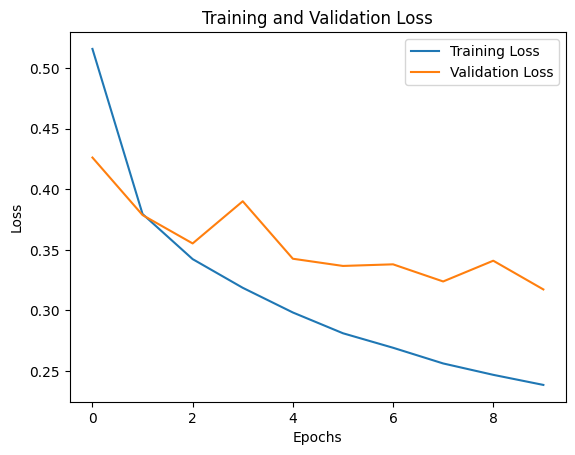

In [18]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.show()

In [19]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.8800 - loss: 0.3395
Test Accuracy: 0.8813999891281128


### Increaing the batch size and epochs as validation loss is deacreasing 

In [22]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=32, validation_data=(val_images, val_labels))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9476 - loss: 0.1362 - val_accuracy: 0.8896 - val_loss: 0.4256
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9539 - loss: 0.1221 - val_accuracy: 0.8898 - val_loss: 0.4427
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9523 - loss: 0.1282 - val_accuracy: 0.8859 - val_loss: 0.4394
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9501 - loss: 0.1294 - val_accuracy: 0.8879 - val_loss: 0.4528
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9555 - loss: 0.1152 - val_accuracy: 0.8895 - val_loss: 0.4610
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9524 - loss: 0.1273 - val_accuracy: 0.8891 - val_loss: 0.4706
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9572 - loss: 0.1118 - val_accuracy: 0.8895 - val_loss: 0.4458
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9554 - loss: 0.1159 - 

Text(0.5, 1.0, 'Training and Validation Accuracy')

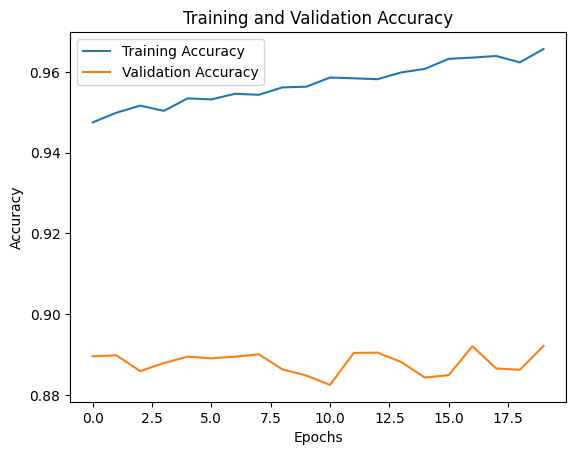

In [24]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

# Increasing the batch made the model little underfit but as validation accuracy is still in 90% range so going for it.

## Prediction

In [25]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


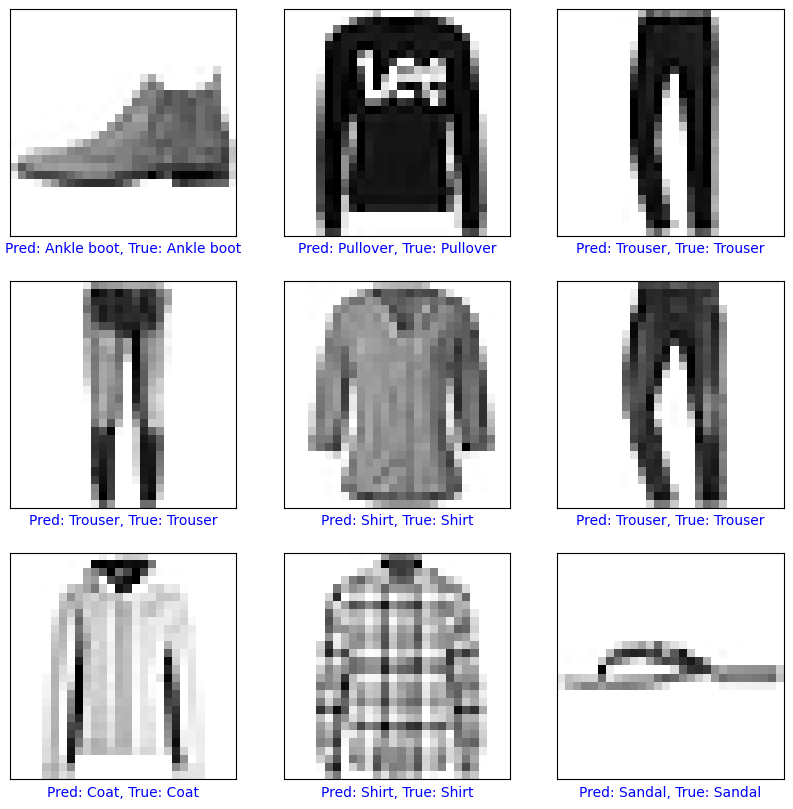

In [26]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Pred: {class_names[predicted_label]}, True: {class_names[true_label]}", color=color)
plt.show()

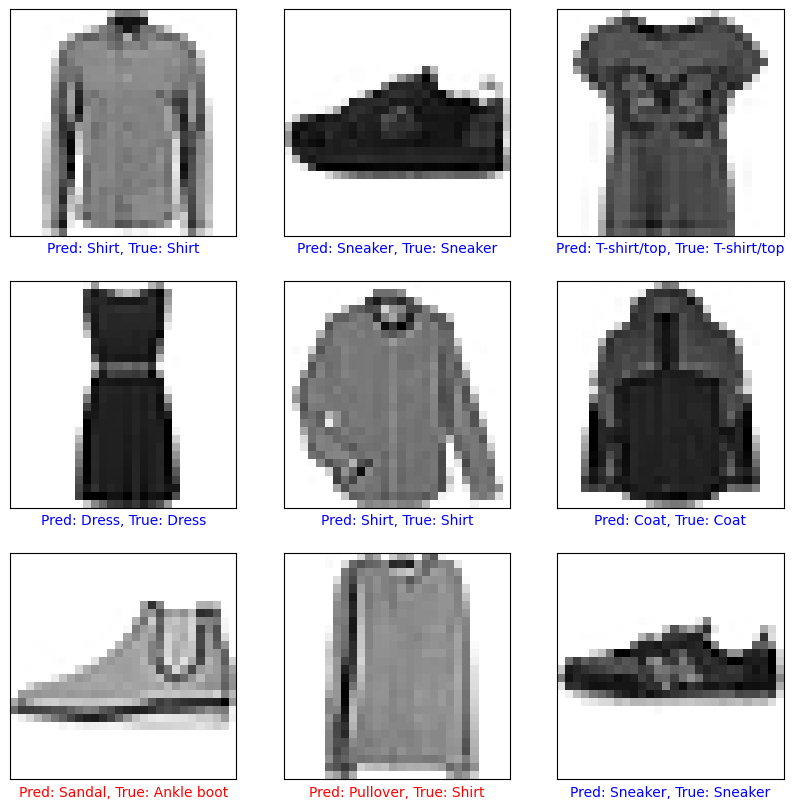

In [33]:
import random
plt.figure(figsize=(10, 10))
random_testlist = [random.randint(0,6000) for i in range(9)]
for index,i in enumerate(random_testlist):
    plt.subplot(3, 3, index+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Pred: {class_names[predicted_label]}, True: {class_names[true_label]}", color=color)
plt.show()

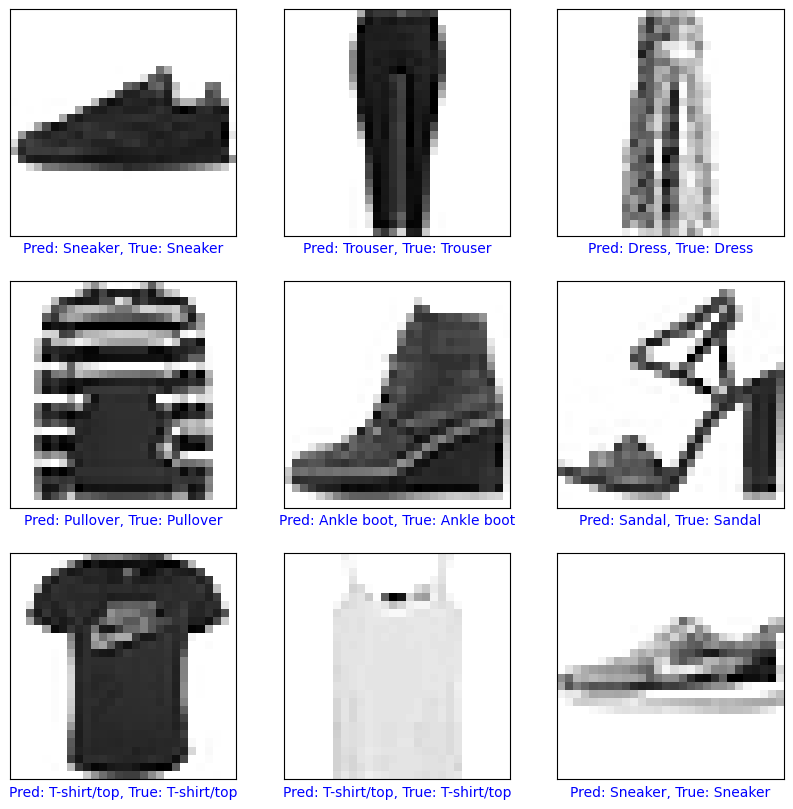

In [34]:
import random
plt.figure(figsize=(10, 10))
random_testlist = [random.randint(0,6000) for i in range(9)]
for index,i in enumerate(random_testlist):
    plt.subplot(3, 3, index+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Pred: {class_names[predicted_label]}, True: {class_names[true_label]}", color=color)
plt.show()